In [165]:
import numpy as np
import scipy.signal
import scipy.fft
from IPython.display import Audio

# Analisis de señales no estacionarias

Mediante la aplicación de la transformada de fourier y análisis del espectro identificamos componentes frecuenciales de la señal, como si estas fuesen estaciónarias. es decir que sus propiedades no varian en el tiempo.

### Pero que ocurre si la frecuencia de una señal varía en el tiempo?

Consideremos este ejemplo en donde hay un cambio abrupto en la frecuenica de la señal

$$
s(t) = \begin{cases}\cos(2\pi f_1 t) & t <0  \\ \cos(2\pi f_2 t) & t \geq 0 \end{cases}
$$

Sea por ejemplo $f_1=440$ Hz y $f_2 = 220$ Hz. Si la graficamos:

In [166]:
f1, f2, Fs = 440, 220, 44100
t = np.arange(-0.5, 0.5, step=1/Fs)
N = len(t)
s = np.concatenate((np.cos(2.0*np.pi*f1*t[:N//2]), 
                    np.cos(2.0*np.pi*f2*t[N//2:])))

plt.plot(t,s)
plt.xlim(-0.05,0.05)
plt.xlabel("tiempo [s]")
plt.ylabel("x(t)")

Audio(s, rate=Fs)

Su fft nos devuelve unicamente las frecuenicias que componene a esta señal como una sintesis del contenido, pero no tenemos una idea clara del momento de su ocurrencia.

In [172]:
fs

10

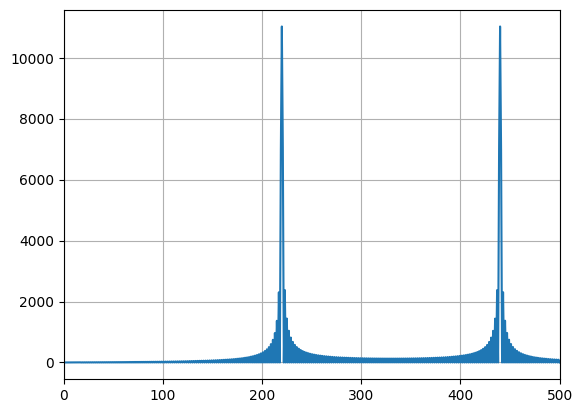

In [171]:
S=np.fft.fft(s)
freq=np.linspace(0,Fs,len(s))
plt.plot(freq,np.abs(S))
plt.xlim(0,500)
plt.grid()
plt.show()

Incorporemos el concepto de **frecuencia intantánea** es decir como cambia la fase/angulo/argumento de nuestro seno/coseno en función del tiempo.

$$
f(t) =  \frac{1}{2\pi} \frac{d \phi (t)}{dt}
$$

Por ejemplo señal sinusoidal con una frecuencia que cambia en el tiempo sería entonces

$$
s(t) = A \cos( \phi(t) ) = A \cos \left(2\pi \int_0^t f(\tau) d\tau + \phi(0) \right)
$$

de donde podemos notar que si la frecuencia fuera constante, es decir $f(t) = f_0$ $\forall t$, entonces $\int_0^t f(\tau) d\tau = t f_0$ y recuperamos $A\cos(2\pi t f_0 + \phi)$ 

En cualquier caso donde $f(t)$ no es constante estaremos ante una señal no estacionaria

A continuación dos ejemplos de señales donde la frecuencia cambia con el tiempo

- El chirrido: señal cuya frecuencia cambia entre dos valores
- El vibrato: señal que está modulada en frecuencia por otra señal

## Chirrido / Chirp

Un *chirp* es una señal cuya frecuencia varía suavemente entre un primer valor $f_0$ y un segundo valor $f_1$. Por ejemplo esta variación podría seguir una forma lineal 

$$
f(t) = f_{0} + (f_{1} - f_{0}) \frac{(t - t_{0})}{(t_{1} - t_{0})},
$$

donde $t_0$ y $t_1$ son los tiempos en que la señal oscila a $f_0$ y $f_1$, respectivamente. También se puede usar una forma no lineal, por ejemplo cuadrática o exponencial

Los *chirp* se usan como modelo en aplicaciones asociadas a radar y sonar. También se han usado para modelar el canto de algunas aves con el objetivo de hacer identificación automática

Podemos crear un chirrido sintético con `scipy` usando 

```python

scipy.signal.chirp(t, # Un vector de tiempos
                   f0, # La frecuencia en el tiempo t=0
                   t1, # El tiempo en el cual f=f1
                   f1, # La frecuencia para el tiempo t=t1
                   method='linear', # Otras opciones disponibles: 'quadratic', 'logarithmic' o 'hyperbolic'
                   ...
                   )

```

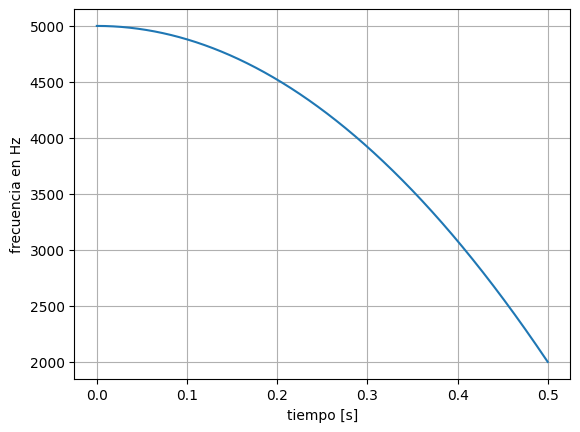

In [173]:
f0, f1, Fs = 5000, 2000, 44100
t = np.arange(0, 0.5, step=1./Fs); 
s = 0.1*scipy.signal.chirp(t, f0=f0, f1=f1, t1=t[-1], method='quadratic')

plt.plot(t,f0 + (f1 - f0)*(t/t[-1])**2)
plt.xlabel("tiempo [s]")
plt.ylabel("frecuencia en Hz")
plt.grid()

Audio(s, rate=Fs, normalize=False)

### Frecuencia Modulada (FM)

La FM es una tecnología para guardar información en la frecuencia de una onda electromagnética. Es un tipo de **codificación** que se usa mucho en transmisiones de radio. 

- La onda electromagnética se llama **señal portadora**. En radio corresponde a una sinusoide con una frecuencia central en el rango de 88 a los 108 [MHz]
- La información se llama **señal modulada**. En radio corresponde tipicamente a una señal de voz o a una canción, es decir que está en el rango de los 20 [Hz] a 20 [kHz] (rango audible humano)

Una señal en el rango audible puede viajar algunos metros. En cambio, si va codificada en la señal portadora puede viajar cerca de 50 km

El siguiente esquema muestra la operación que realiza una estación de radio que transmite señales



La radio que recibe la señal debe realizar el proceso inverso, es decir decodificar la información a partir de la frecuencia de la señal que está recepcionando


Matemáticamente la señal modulada $s_m(t)$ modifica la frecuencia central $f_c$ de la señal portadora como sigue

$$
\begin{align}
s(t) & = A_c \cos \left(2\pi \int_0^t \left(f_c + K s_m(\tau) \right) d\tau \right) \nonumber \\
&= A_c \cos \left(2\pi f_c t + 2\pi K  \int_0^t s_m(\tau) d\tau \right), \nonumber
\end{align}
$$

donde $K$ es el coeficiente de modulación y $s(t)$ es la señal que finalmente viaja por el medio

Cada estación de radio transmite su información $s_m(t)$ usando una frecuencia portadora $f_c$ distinta para no traslaparse

### Vibrato

Un [vibrato](https://es.wikipedia.org/wiki/Vibrato) es un efecto musical que consiste en variar periódicamente el tono de una nota. 

Podemos considerar el vibrato como un caso particular de modulación de frecuencia. Si consideremos sólo tonos puros podríamos definir $s_m(t) = \cos(2\pi f_m t)$, con lo que nos queda la siguiente señal

$$
s(t) = A_c \cos \left(2\pi f_c t + \frac{K}{f_m} \sin(2\pi f_m t)  \right),
$$

De la expresión tenemos que

- $f_c$ es la frecuencia o tono central
- $f_m$ es la velocidad a la que cambia el tono central
- $K/f_m$ es la amplitud del cambio del tono central

Podemos implementar un vibrato usando

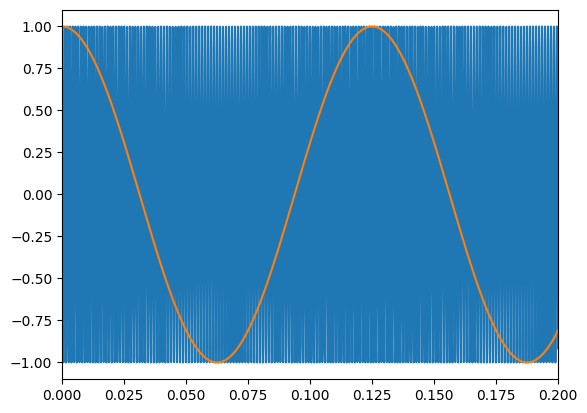

In [178]:
A_c, K, f_c, f_m, Fs = 1, 50, 880, 8, 44100
t = np.arange(0, 2, step=1/Fs)
sm = np.cos(2.0*np.pi*f_m*t)
s = A_c*np.cos(2.0*np.pi*f_c*t + (K/f_m)*np.sin(2.0*np.pi*f_m*t))

plt.plot(t,s)
plt.plot(t,sm)
plt.xlim(0,0.2)

Audio(s, rate=Fs)

La herramienta mas usada que nos permitirá observar la evolución temporal del espectro, es el **"espectrograma"**
este consiste en una visualizacion tiempo-frecuencia meidante una superficie, es decir tendrá una representación bidimensional.

97759


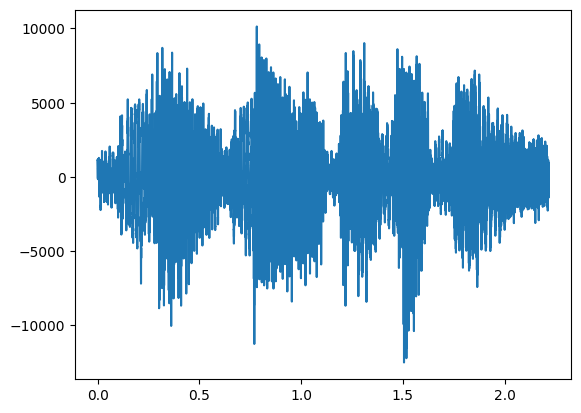

In [179]:
fs,x=read("LEAVESNAKESBW.wav")
print(len(x))
#x=x[:]
t=np.linspace(0,len(x)/fs,len(x))
plt.plot(t,x)
X=np.fft.fft(x)
Audio(x, rate=fs)


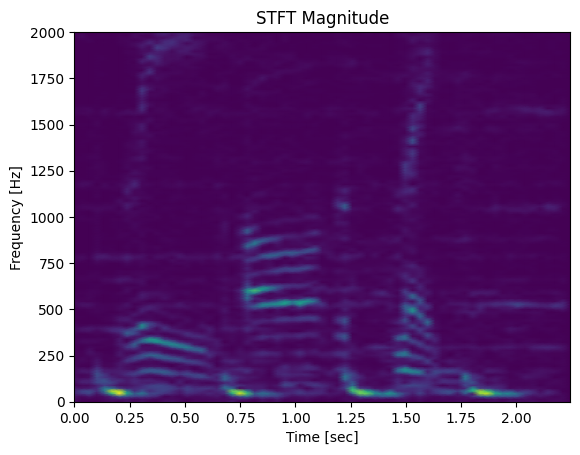

In [118]:

#%matplotlib QT5
f, tf, Zxx = signal.stft(x, fs, nperseg=3000)

#amp=np.max(x)

plt.pcolormesh(tf, f, np.abs(Zxx), vmin=0, vmax=2000, shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(0,2000)
plt.show()

Notar que:

- El eje horizontal representa tiempo (segundos)
- El eje vertical representa frecuencia (Hz)
- Se usa color para representar la intensidad energética

En la imagen se puede apreciar como el contenido energético cambia su distribución de forma notoria en  los momentos de respiración (breath) y habla (speech). Muchos algoritmos actuales de reconocimiento de habla (por ejemplo redes neuronales artificiales) operan reconociendo patrones a partir del espectrograma.

:::{important}

A diferencia del espectro, el espectrograma nos permite estudiar los cambios de energía "instantáneos" de la señal

:::

### Ahora como esta construido?


Para calcular el espectrograma se utiliza la *short-time Fourier transform* (STFT). Para el caso de una señal discreta la STFT se define como

$$
S[m, k] = \sum_{n} s[n] w[n-m] e^{-j \frac{2\pi}{N} nk}
$$

Notemos como la STFT tanto del tiempo (índice m) como de la frecuencia (índice k)

En la práctica la STFT consiste en 

1. multiplicar la señal por una ventana localizada $w[n-m]$ 
2. calcular la FFT sobre esa ventana

Esto se repite para distintas ventanas como muestra el siguiente diagrama. 

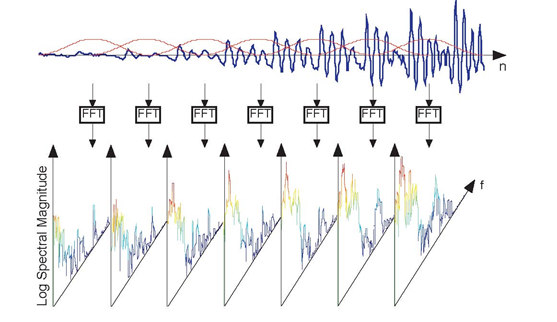

En la parte superior de la imagen, la linea azul es la señal y las lineas rojas son las ventanas desplazadas. En la parte inferior se muestra que de cada ventana desplazada se obtiene un espectro. Finalmente el espectrograma consiste en juntar los espectros de amplitud de cada ventana. Notemos que puede haber traslape entre las ventanas

:::{note}

Cuando utilizamos el espectrograma estamos asumiendo que la señal es "localmente" estacionaria. Es decir que es estacionaria dentro de la ventana.

:::

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
from scipy.io.wavfile import read
from scipy import signal
%matplotlib inline


### Analizaremos señales mediante el metodo de Short Time Fourier Transform:

23276


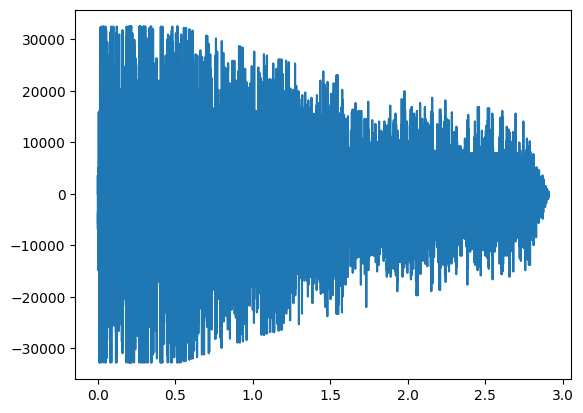

In [180]:
fs,x=read("Vehicle-09_mono.wav")
print(len(x))
x=x[:]

t=np.linspace(0,len(x)/fs,len(x))

plt.plot(t,x)

X=np.fft.fft(x)

Audio(x, rate=fs)

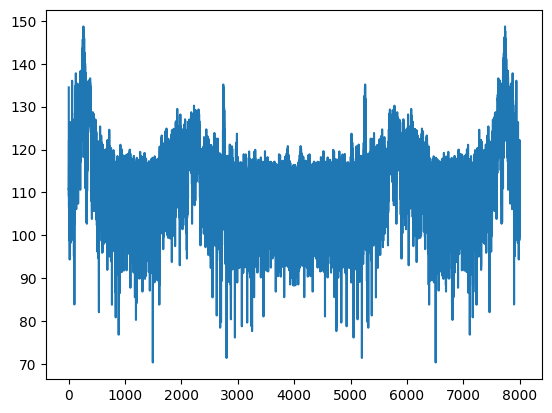

In [181]:
frec=np.linspace(0,fs,len(x))
plt.plot(frec,20*np.log10(np.abs(X)))
plt.show()

In [182]:
signal.stft?

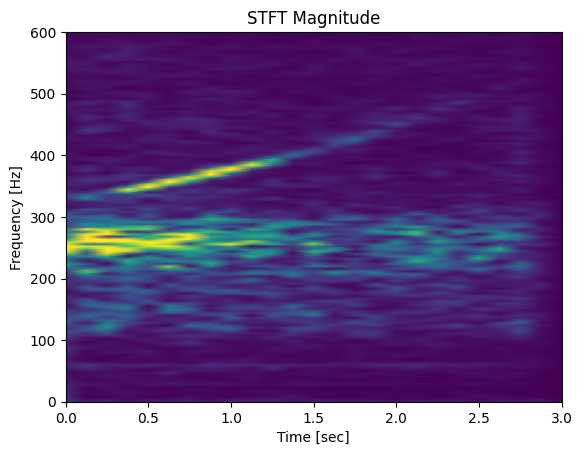

In [189]:
#%matplotlib QT5
f, tf, Zxx = signal.stft(x, fs, nperseg=2000)

#amp=np.max(x)

plt.pcolormesh(tf, f, np.abs(Zxx), vmin=0, vmax=3000, shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(0,600)
plt.show()

#### Logra observar las variaciones de la frecuencia en el tiempo?
#### Cómo explica este fenomeno?
#### Que benefició obtiene que debe resignar comparado con la aplicación de la trasformada de fourier discreta en el tiempo?

3000


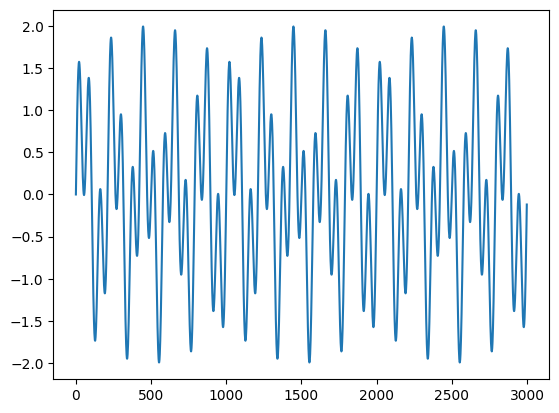

In [122]:
%matplotlib inline
fs=1000 
t=np.arange(0,3,1/fs)

print(len(t))

f1=5
f2=14

x=np.sin(2*np.pi*f1*t)+np.sin(2*np.pi*f2*t)

plt.plot(x)

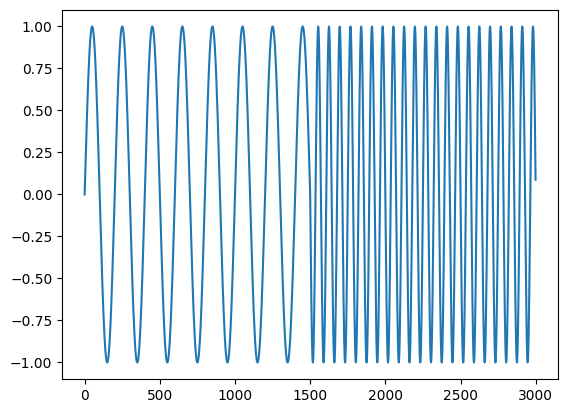

In [123]:
t=np.arange(0,3,1/fs)

a=np.append(np.ones(1500),np.zeros(1500))

b=np.roll(a,1500)

#plt.plot(a)
#plt.plot(b)

x2=a*np.sin(2*np.pi*f1*t)-b*np.sin(2*np.pi*f2*t)

plt.plot(x2)

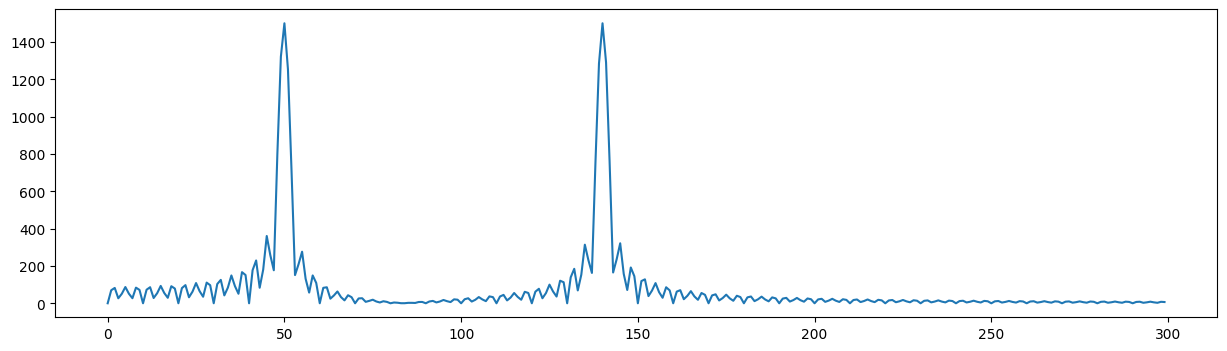

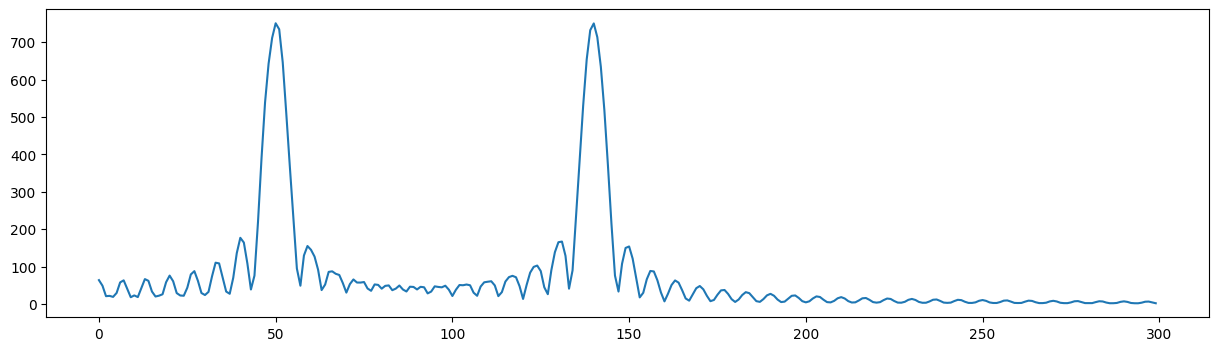

In [124]:
X1=np.fft.fft(x,10000)
X2=np.fft.fft(x2,10000)


plt.figure(figsize=(15,4))

plt.plot(np.abs(X1)[0:300])
plt.show()
         
plt.figure(figsize=(15,4))

plt.plot(np.abs(X2)[0:300])




#### Puede mediante los epsctros indicar en que momento ocurrieron los eventos?
#### Pruebe utilzar la STFT y manifieste sus conclusiones.

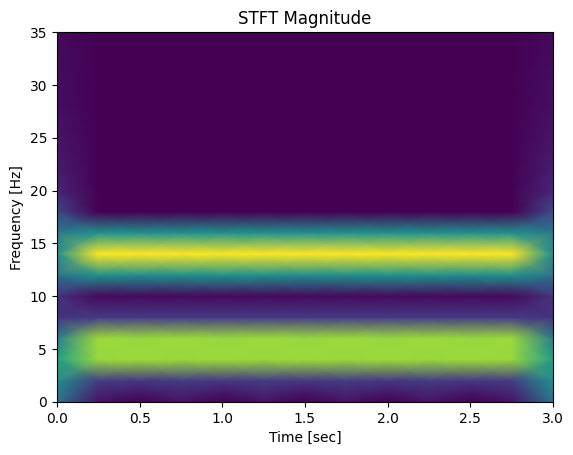

In [125]:
f, tf, Zxx = signal.stft(x, fs, nperseg=500)

amp=np.max(x)

plt.pcolormesh(tf, f, np.abs(Zxx), vmin=0, vmax=0.5, shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(0,35)
plt.show()

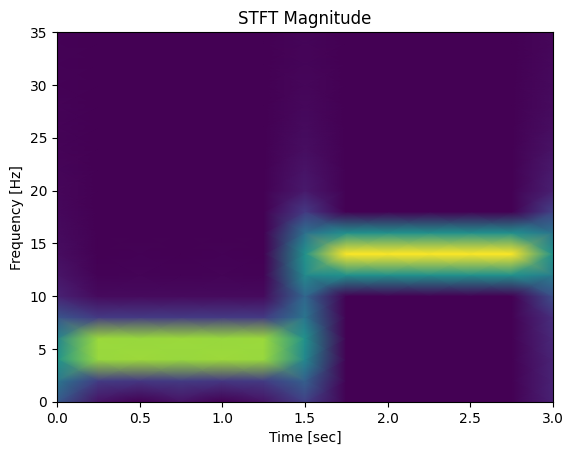

In [126]:
f, tf, Zxx = signal.stft(x2, fs, nperseg=500)

amp=np.max(x)

plt.pcolormesh(tf, f, np.abs(Zxx), vmin=0, vmax=0.5, shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(0,35)
plt.show()

Otra funcion para obtener espectrogramas

Podemos usar la función de `scipy.signal.spectrogram` cuyos parámetros más relevantes son

```python
spectrogram(x, # Señal
            fs=1.0, # Frecuencia de muestreo
            window=('tukey', 0.25), # Tipo de ventana y parámetros de ventana
            nperseg=None, # Ancho de la ventana en número de muestras
            noverlap=None, # Cantidad de traslape, por defecto es 1/8 del largo de ventana
            ...
           )
```

Esta función retorna una tupla con

- Un arreglo con las frecuencias del espectrograma de largo M
- Un arreglo con los tiempos de las ventanas de largo N
- Una matriz de MxN con los valores del espectrograma

Calculemos y visualicemos el espectrograma de la señal de ejemplo que vimos al principio de esta lección

(0.0, 1000.0)

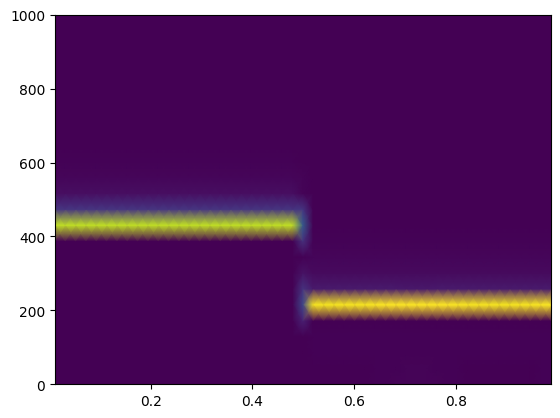

In [133]:
f1, f2, Fs = 440, 220, 44100
t = np.arange(0.0, 1.0, step=1/Fs)
N = len(t)
s = np.concatenate((np.cos(2.0*np.pi*f1*t[:N//2]), 
                    np.cos(2.0*np.pi*f2*t[N//2:])))

freqs, times, Sxx = scipy.signal.spectrogram(s, fs=Fs, nperseg=1024)

plt.pcolormesh(times, freqs, np.abs(Sxx), shading='gouraud')

# TENER CUIDADO CON LAS ESCALAS

plt.ylim(0,1000)

(0.0, 1000.0)

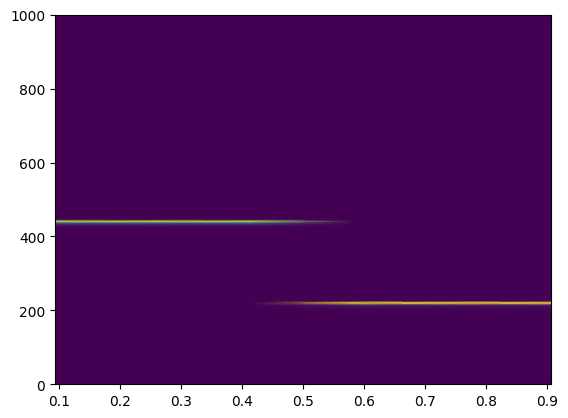

In [135]:
f1, f2, Fs = 440, 220, 44100
t = np.arange(0.0, 1.0, step=1/Fs)
N = len(t)
s = np.concatenate((np.cos(2.0*np.pi*f1*t[:N//2]), 
                    np.cos(2.0*np.pi*f2*t[N//2:])))

freqs, times, Sxx = scipy.signal.spectrogram(s, fs=Fs, nperseg=8192)

plt.pcolormesh(times, freqs, np.abs(Sxx), shading='gouraud')

# TENER CUIDADO CON LAS ESCALAS

plt.ylim(0,1000)

### Argumentos y trade-off del espectrograma

Para calcular el espectrograma debemos seleccionar 

- un tipo o función de ventana, por ejemplo Hamming, Tukey o Kaiser
- un ancho de ventana, expresado tipicamente en número de muestras
- un traslape de ventana, expresado tipicamente en número de muestras o en porcentaje de traslape

En la lección de "Fuga espectral" vimos que la resolución frecuencial en el espectro depende fuertemente del número de muestras (ancho) de la ventana y el tipo o función de la ventana. En particular mientras más ancha es la ventana mejor es la resolución en el eje de frecuencia. 

Sin embargo si la ventana es demasiado ancha no podremos identificar bien los eventos más breves o rápidos. 

:::{warning}

En el espectrograma existe un compromiso (*trade-off*) entre la resolución en el tiempo y la resolución en frecuencia. No se puede mejorar una sin empeorar la otra.

:::

El siguiente esquema ejemplifica esta situación

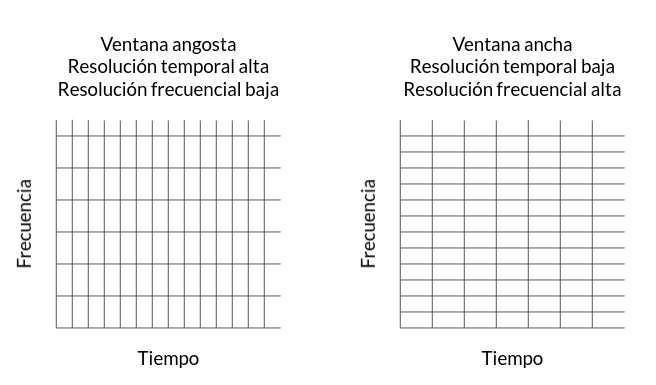

### Espectrograma de un vibrato

Implementemos nuevamente el vibrato con frecuencia instantanea

$$
f(t) = f_c + K \cos(2.0\pi f_m t)
$$

In [136]:
A_c, K, f_c, f_m, Fs = 1, 25, 440, 8, 44100
t = np.arange(0, 1, step=1/Fs)
sm = np.cos(2.0*np.pi*f_m*t)
s = A_c*np.cos(2.0*np.pi*f_c*t + (K/f_m)*np.sin(2.0*np.pi*f_m*t))
window = ('kaiser', 6.)

A continuación se muestran tres espectrogramas con distinto largo de ventana. La linea roja punteada corresponde $f(t)$ en función de $t$. En todos los espectrogramas se usó una ventana de Kaiser con $\beta=6$

In [145]:
def plot_spectrogram(Nw):
    display(f'Ventana de {1000*Nw/Fs:0.4f} [ms]')
    freqs, times, Sxx = scipy.signal.spectrogram(s, fs=Fs, nperseg=Nw, noverlap=Nw//1.5, window=window)
    
    plt.pcolormesh(times, freqs, np.abs(Sxx), shading='gouraud')
    plt.plot(t, f_c + K*sm,color="r")
    plt.ylim(300,600)
    #formula = hv.Curve((t, f_c + K*sm)).opts(color='r', line_dash='dashed')
    #spectrogram = hv.Image((times, freqs, Sxx), kdims=['Tiempo [s]', 'Frecuencia [Hz]']).opts(ylim=(300, 600)) 
    #return spectrogram * formula

'Ventana de 11.6100 [ms]'

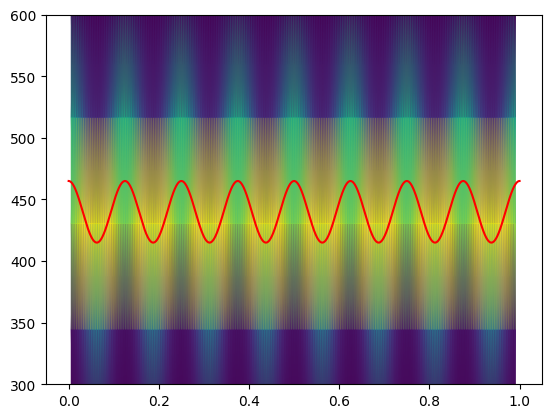

In [146]:
plot_spectrogram(512)

Ventana muy angosta: Resolución temporal superior (eje horizontal) pero gran dispersión en la frecuencia (eje vertical)

'Ventana de 183.5828 [ms]'

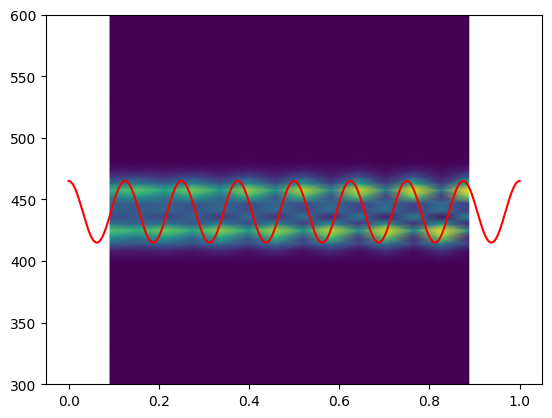

In [147]:
plot_spectrogram(8096)

Ventana muy ancha: Resolución frecuencial superior (eje vertical) pero gran dispersión en el tiempo (eje horizontal)

'Ventana de 46.4399 [ms]'

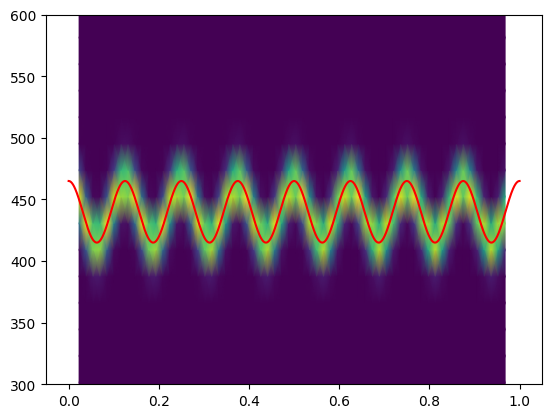

In [149]:
plot_spectrogram(2048)

Compromiso: La ventana de 46 [ms] parece presentar un mejor compromiso entre resolución temporal y frecuencial.

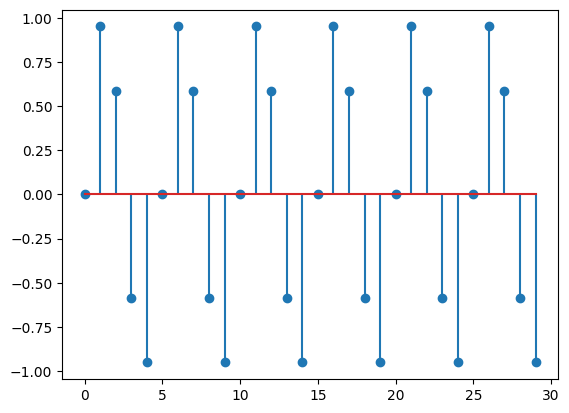

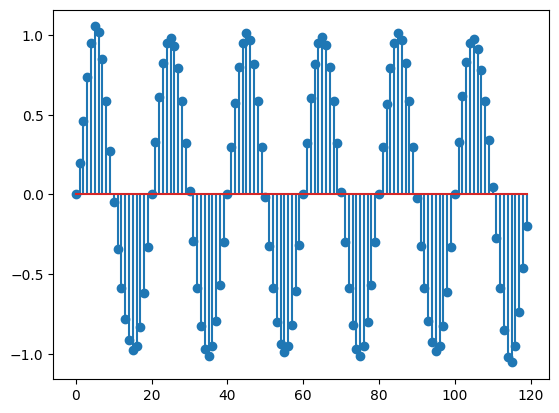

In [127]:
%matplotlib inline

fs=10
T=1/fs
t=np.arange(0,3,1/fs) # 3 s * 10/s 30 muestras
f=2 #frecuencia de la señal
x= np.sin(2*np.pi*f * t)

plt.stem(x)
plt.show()

#ahora xi se "recore" en m que por consigna son 4 veces frecuencia de muestreo
#por tanto m=4*len(x) y fs2=4*fs  y T2=1/fs2

f2=4*fs
T2=1/f2
#cada muestra de xi[m] se evalua segun la ecuacion que basicamente 
#"acumula" los productos de x[n] * por la sinc()

nuevas_muestras=4*len(x) 

xi=[]

for m in range(nuevas_muestras): 
    x_i=0
    for n in range(len(x)):

        x_i=x_i+x[n]*np.sinc((m*T2-n*T)/T) #acumula para cada x[n]*sinc()
    
    xi.append(x_i) #agrega 1 valor en la posicion m 


plt.stem(xi)
plt.show()

In [ ]:
tweetyyBW.wav

177328


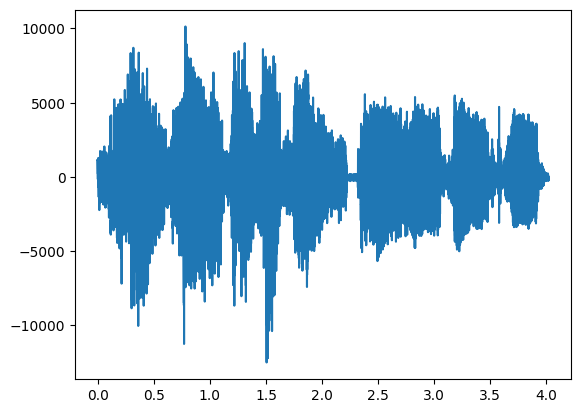

In [3]:
fs,x=read("tweetyyBW.wav")
print(len(x))
#x=x[:]

t=np.linspace(0,len(x)/fs,len(x))

plt.plot(t,x)

X=np.fft.fft(x)

Audio(x, rate=fs)

In [25]:
np.where(freq>1000)[0]

array([  4022,   4023,   4024, ..., 177325, 177326, 177327], dtype=int64)

In [55]:
freq=np.linspace(0,fs,len(x))
plt.plot(freq,np.abs(X)/max(abs(X)))
#plt.xlim(0,7500)


mask=np.ones(len(x))
mask[np.where((freq>1000)&(freq<fs-1000))[0]]=0
plt.plot(freq,mask)
plt.show()

plt.plot(freq,np.abs(X)*mask)
plt.xlim(0,7500)

xfilt=np.fft.ifft(X*mask)

#Xbass=

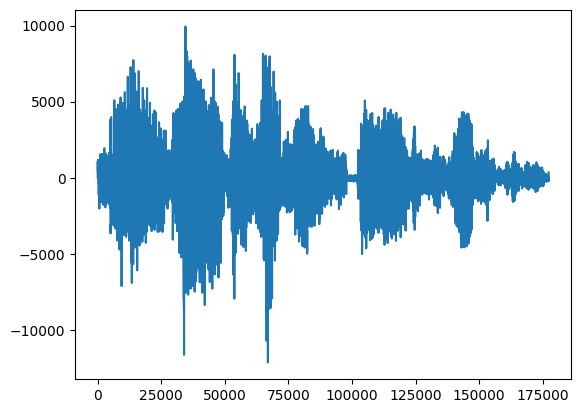

In [54]:
plt.plot(xfilt)
Audio(xfilt, rate=fs)

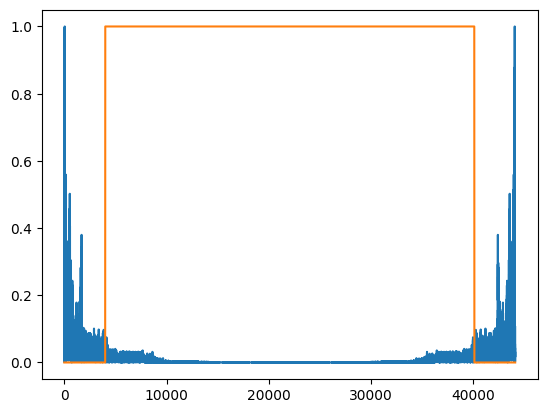

In [63]:
freq=np.linspace(0,fs,len(x))
plt.plot(freq,np.abs(X)/max(abs(X)))
#plt.xlim(0,7500)


mask=np.ones(len(x))
mask[np.where((freq>fs-4000))[0]]=0
mask[np.where((freq<4000))[0]]=0
plt.plot(freq,mask)
plt.show()

plt.plot(freq,np.abs(X)*mask)
plt.xlim(0,7500)

xfilt=np.fft.ifft(X*mask)

plt.show()

plt.plot(xfilt)
Audio(xfilt, rate=fs)

#Xbass=

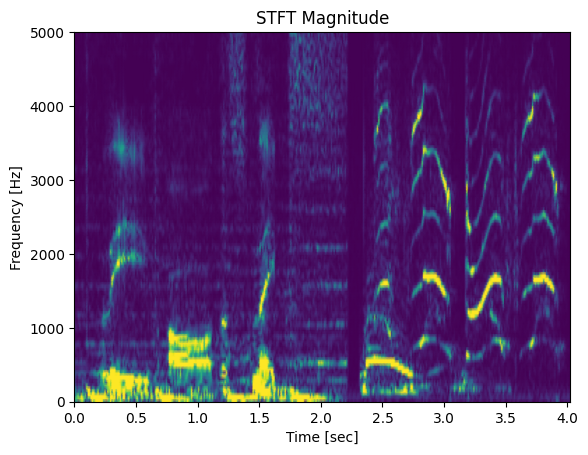

In [61]:
#%matplotlib QT5
f, tf, Zxx = signal.stft(x, fs, nperseg=1000)

#amp=np.max(x)

plt.pcolormesh(tf, f, np.abs(Zxx), vmin=0, vmax=500, shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(0,5000)
plt.show()

44100